In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Fourth example : Regression

In [11]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = ( boston_housing.load_data())

# Normalizing the data in order to center them around 0 with a unit standard deviation
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

# Building the model
from tensorflow import keras 
from tensorflow.keras import layers
def build_model():
  model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(1)])
  model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
  return model

# Kfold
num_epochs = 500
all_mae_histories = [] 
for i in range(k):
  print(f"Processing fold #{i}")
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples] 
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate( [train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
  partial_train_targets = np.concatenate( [train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
  model = build_model() 
  history = model.fit(partial_train_data, partial_train_targets, validation_data=(val_data, val_targets), epochs=num_epochs, batch_size=16, verbose=0)
  mae_history = history.history["val_mae"]
  all_mae_histories.append(mae_history) 

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [10]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

2.3177299797534943

In [13]:
# Final model
model = build_model()
model.fit(train_data, train_targets,
epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 4ms/step - loss: 14.0010 - mae: 2.4507


In [15]:
predictions = model.predict(test_data)
predictions[0][0]

7.3669386

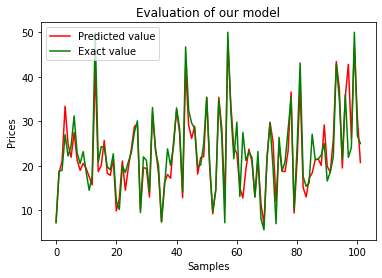

In [27]:
# Predictions 
predictions = model.predict(test_data)

t = list()
t2 = list()
for i in range(len(predictions)):
  t.append( (predictions[i][0]))
for i in range(len(test_targets)):
  t2.append( (test_targets[i]) )

plt.plot( [i for i in range(len(predictions))] ,  t , color = 'r' , label="Predicted value")
plt.plot( [i for i in range(len(test_targets))] , t2 , color = 'g' , label="Exact value")
plt.title("Evaluation of our model")
plt.ylabel('Prices')
plt.xlabel('Samples')
plt.legend()
plt.show()